In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [223]:
pd.set_option('display.max_columns', None)

In [224]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [225]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 103,2.25,6367.0,3534.0,Built Up area: 3534 (328.32 sq.m.)Carpet area:...,3,5,3+,10.0,South,Undefined,NaN,3534.0,2000.00,0,0,0,0,0,2,0,1178.000000
1,flat,vatika emilia floors,sector 83,0.65,6190.0,1050.0,Super Built up area 1050(97.55 sq.m.)Built Up ...,2,2,2,1.0,South,Relatively New,1050.0,950.0,850.00,0,0,0,0,0,1,174,525.000000
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up...,3,4,3,14.0,East,Relatively New,1900.0,1305.0,1173.00,1,1,0,0,0,2,167,391.000000
3,flat,emaar gurgaon greens,sector 102,1.30,7879.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,4.0,East,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,1,125,550.000000
4,house,signature global city,sector 37d,1.27,8089.0,1570.0,Plot area 1570(145.86 sq.m.),3,3,3,4.0,East,Undefined,NaN,1570.0,NaN,0,0,0,1,0,2,89,523.333333


In [226]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1677
built_up_area          1967
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

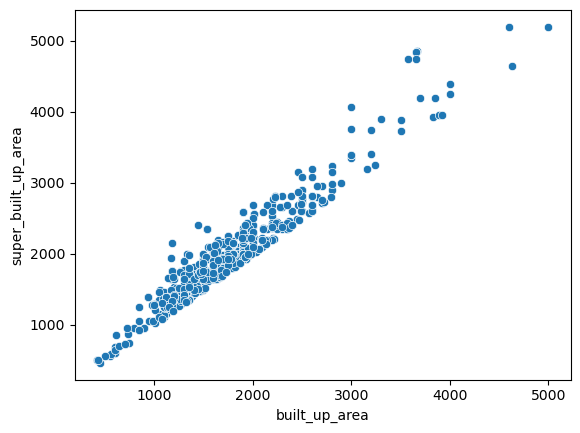

In [227]:
sns.scatterplot(x= df['built_up_area'], y= df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

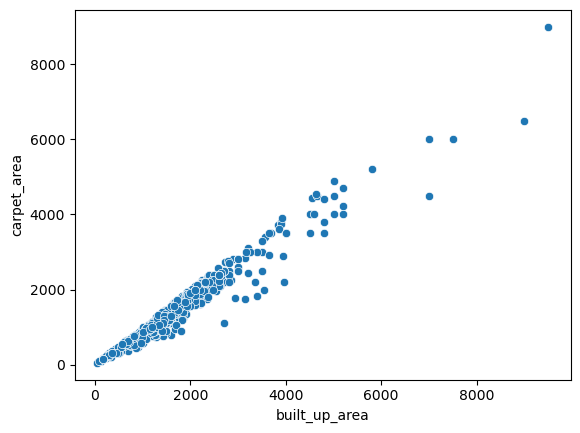

In [228]:
sns.scatterplot(x = df['built_up_area'], y= df['carpet_area'])

In [229]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3548    False
3549    False
3550    False
3551    False
3552    False
Length: 3553, dtype: bool

In [230]:
all_present_df = df[~(df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull())]

In [231]:
all_present_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,vatika emilia floors,sector 83,0.65,6190.0,1050.0,Super Built up area 1050(97.55 sq.m.)Built Up ...,2,2,2,1.0,South,Relatively New,1050.0,950.0,850.00,0,0,0,0,0,1,174,525.000000
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up...,3,4,3,14.0,East,Relatively New,1900.0,1305.0,1173.00,1,1,0,0,0,2,167,391.000000
3,flat,emaar gurgaon greens,sector 102,1.30,7879.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,4.0,East,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,1,125,550.000000
4,house,signature global city,sector 37d,1.27,8089.0,1570.0,Plot area 1570(145.86 sq.m.),3,3,3,4.0,East,Undefined,NaN,1570.0,NaN,0,0,0,1,0,2,89,523.333333
5,flat,ats kocoon,sector 109,2.22,10597.0,2095.0,Super Built up area 2095(194.63 sq.m.)Built Up...,3,4,3,14.0,East,Relatively New,2095.0,1860.0,NaN,1,1,1,1,0,2,45,698.333333


In [232]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [233]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [234]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.111864406779661 0.9


In [235]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [236]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,emaar gurgaon greens,sector 102,1.30,7879.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,4.0,East,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,1,125,550.0
8,flat,rof ananda,sector 95,0.26,6032.0,431.0,Super Built up area 431(40.04 sq.m.)Carpet are...,1,1,1,8.0,North,New Property,431.0,NaN,380.44,0,0,0,0,0,2,49,431.0
22,flat,mapsko mount ville,sector 79,1.10,12731.0,864.0,Super Built up area 1490(138.43 sq.m.)Carpet a...,3,3,3,22.0,South-West,Relatively New,1490.0,NaN,863.91,1,0,0,1,0,1,135,288.0
24,flat,shyam apartment,sector 3,0.26,3714.0,700.0,Super Built up area 700(65.03 sq.m.)Carpet are...,2,1,2,2.0,NaN,Relatively New,700.0,NaN,530.00,0,0,0,0,0,2,0,350.0
26,flat,pareena laxmi apartments,sector 99a,0.32,5787.0,553.0,Super Built up area 553(51.38 sq.m.)Carpet are...,2,2,2,11.0,NaN,New Property,553.0,NaN,453.50,0,0,0,0,0,2,66,276.5


In [237]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.111) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3764\2064187664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.111) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [238]:
df.update(sbc_df)

In [239]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1677
built_up_area          1546
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [240]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [241]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
6,flat,chd avenue,sector 71,1.20,7407.0,1620.0,Super Built up area 1620(150.5 sq.m.),3,3,3,4.0,North,Relatively New,1620.0,NaN,NaN,0,0,0,0,1,1,49,540.000000
9,flat,tulip violet,sector 69,2.00,9950.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,0.0,West,Relatively New,2010.0,NaN,NaN,0,0,0,0,0,2,95,502.500000
11,flat,smart world one dxp,sector 113,3.45,13269.0,2600.0,Super Built up area 2600(241.55 sq.m.),4,4,3,11.0,South-East,Undefined,2600.0,NaN,NaN,1,1,0,0,0,1,156,650.000000
12,flat,shree vardhman victoria,sector 70,1.25,9259.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,3.0,East,Relatively New,1350.0,NaN,NaN,1,0,0,0,0,2,43,675.000000
16,flat,maruti kunj,sector 11,0.80,5161.0,1550.0,Super Built up area 1550(144 sq.m.),3,2,No,0.0,NaN,Old Property,1550.0,NaN,NaN,0,0,0,0,0,2,8,516.666667


In [242]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.111),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3764\421654604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.111),inplace=True)


In [243]:

df.update(sb_df)

In [244]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1677
built_up_area           670
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [245]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [246]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3764\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [247]:

c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
7,flat,smart world orchard,sector 61,1.58,13739.0,1150.0,Carpet area: 1150 (106.84 sq.m.),2,2,2,3.0,South,New Property,NaN,1278.0,1150.0,1,0,0,0,0,2,15,575.000000
13,flat,vatika gurgaon,sector 83,1.19,7438.0,1600.0,Carpet area: 1600 (148.64 sq.m.),3,3,2,10.0,South,Relatively New,NaN,1778.0,1600.0,0,1,0,0,0,1,35,533.333333
27,flat,lotus elise,sector 99,0.95,6552.0,1450.0,Carpet area: 1450 (134.71 sq.m.),2,3,3,7.0,NaN,Relatively New,NaN,1611.0,1450.0,0,1,0,0,0,2,0,725.000000
36,flat,signature global city,sector 37d,1.10,9839.0,1118.0,Carpet area: 1118 (103.87 sq.m.),2,2,2,4.0,South,Undefined,NaN,1242.0,1118.0,0,0,0,0,0,2,59,559.000000
42,flat,shree vardhman flora,sector 90,0.75,5769.0,1300.0,Carpet area: 1300 (120.77 sq.m.),2,2,3,8.0,North-East,Undefined,NaN,1444.0,1300.0,0,0,0,0,0,2,60,650.000000


In [248]:
df.update(c_df)

In [249]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1677
built_up_area             0
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

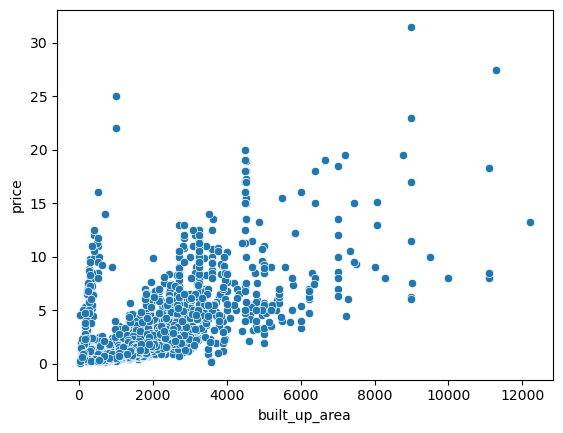

In [250]:
sns.scatterplot(x= df['built_up_area'], y= df['price'])

In [251]:
anamoly_df= df[(df['built_up_area'] < 2000) & (df['price'] > 2.5 )][['price', 'area', 'built_up_area']]

In [252]:
anamoly_df

,price,area,built_up_area
15,3.75,1467.0,1467.0
19,3.40,2200.0,1980.0
33,2.80,1800.0,1900.0
40,7.00,2160.0,240.0
61,5.70,2430.0,270.0
...,...,...,...
3435,4.35,1350.0,1350.0
3444,2.80,1828.0,1828.0
3481,6.75,2088.0,232.0
3487,3.75,1467.0,163.0


In [253]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [254]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

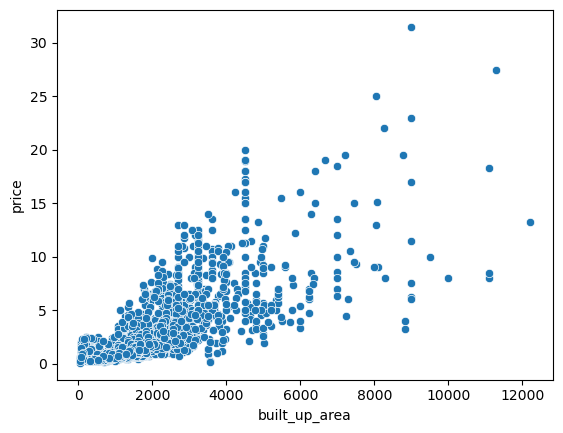

In [255]:
sns.scatterplot(x= df['built_up_area'], y= df['price'])

In [256]:
df.drop(columns = ['area', 'areaWithType', 'super_built_up_area', 'carpet_area', 'area_room_ratio'], inplace = True)

In [257]:
df.shape

(3553, 19)

In [258]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1012
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# floorNum

In [259]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
265,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,2,0
584,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,2,21
876,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,2,28
1010,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,2,9
1197,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,2,9
1329,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,No,NaN,NaN,Undefined,1758.0,0,0,0,0,0,2,0
1467,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,2,0
1903,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,2,88
2011,house,ansal sushant lok plots4.1 â˜…,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,2,0
2151,flat,NaN,sector 78,0.60,3692.0,2,2,No,NaN,NaN,Undefined,1625.0,0,0,0,0,0,2,0


In [260]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [261]:
df['floorNum'].fillna(2.0, inplace= True)

In [262]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1012
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# facing

<Axes: ylabel='count'>

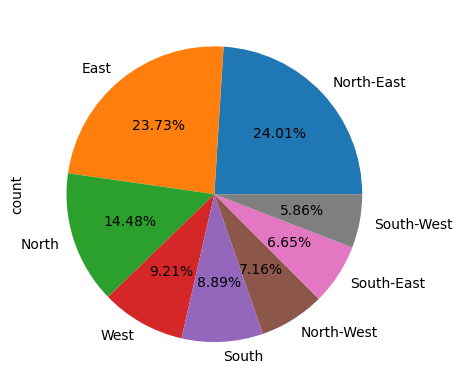

In [263]:
df['facing'].value_counts().plot(kind = 'pie', autopct= '%0.2f%%')

In [264]:
df.groupby('facing')['price'].mean().sort_values()

facing
South         2.021460
North-West    2.261374
South-East    2.327751
South-West    2.352081
West          2.792607
East          2.813798
North         2.858533
North-East    2.922934
Name: price, dtype: float64

<Axes: xlabel='facing', ylabel='price'>

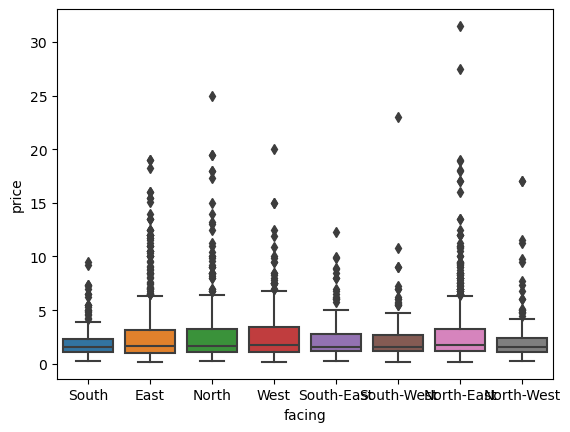

In [265]:
import seaborn as sns
sns.boxplot(x='facing', y='price', data=df)

In [266]:
missing_floor = df[df['facing'].isnull()]

In [267]:
missing_floor.to_csv('missing_floor.csv')

In [268]:
facing_df = pd.read_csv("gurgaon_facing_completed.csv")

In [269]:
df['facing'] = df['facing'].combine_first(facing_df['facing'])

In [270]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
facing             716
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [271]:
# Still 716 values in facing so I decided to drop the facing column
df.drop(columns = 'facing', inplace= True)

In [272]:
df.shape

(3553, 18)

# society

In [273]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2151,flat,NaN,sector 78,0.6,3692.0,2,2,No,2.0,Undefined,1625.0,0,0,0,0,0,2,0


In [274]:
df.drop(index = [2151], inplace = True)

# agePossession

In [275]:
df['agePossession'].value_counts()

agePossession
Relatively New        1604
New Property           558
Moderately Old         545
Undefined              515
Old Property           292
Under Construction      38
Name: count, dtype: int64

In [276]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 103,2.25,6367.0,3,5,3+,10.0,Undefined,3534.0,0,0,0,0,0,2,0
4,house,signature global city,sector 37d,1.27,8089.0,3,3,3,4.0,Undefined,1570.0,0,0,0,1,0,2,89
11,flat,smart world one dxp,sector 113,3.45,13269.0,4,4,3,11.0,Undefined,2340.0,1,1,0,0,0,1,156
23,flat,aipl joy square,sector 63a,0.70,10101.0,1,1,No,7.0,Undefined,693.0,0,0,0,0,0,2,0
29,house,independent,sector 13,0.45,4808.0,1,1,0,1.0,Undefined,936.0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,flat,signature global city 92,sector 92,0.99,9074.0,3,2,3,1.0,Undefined,1091.0,0,0,0,0,0,2,24
3543,flat,signature global park,sohna road,0.75,6938.0,2,2,No,1.0,Undefined,1081.0,0,0,0,0,0,2,58
3544,house,independent,sector 109,1.55,6568.0,3,2,0,1.0,Undefined,2360.0,0,0,0,0,0,2,0
3546,house,vatika sovereign next,sector 82a,3.85,7500.0,5,6,3+,6.0,Undefined,5140.0,0,0,0,0,0,2,53


In [277]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [278]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [279]:
df['agePossession'].value_counts()

agePossession
Relatively New        1823
New Property           614
Moderately Old         588
Old Property           330
Undefined              157
Under Construction      40
Name: count, dtype: int64

In [280]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [281]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [282]:
df['agePossession'].value_counts()

agePossession
Relatively New        1841
New Property           617
Moderately Old         597
Old Property           341
Undefined              116
Under Construction      40
Name: count, dtype: int64

In [283]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [284]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [285]:
df['agePossession'].value_counts()

agePossession
Relatively New        1931
Moderately Old         623
New Property           617
Old Property           341
Under Construction      40
Name: count, dtype: int64

In [286]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [287]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [288]:
df.shape

(3552, 18)